https://machinelearningmastery.ru/monte-carlo-simulations-with-python-part-1-f5627b7d60b0/

https://www.ias.ac.in/article/fulltext/reso/019/08/0713-0739

In [1]:
import numpy as np
import math
import random
from matplotlib import pyplot as plt 
from IPython.display import clear_output
PI = 3.1415926
e = 2.71828

Численно вычислить интеграл $$ \int_0^5 \frac{e^{(-x)}}{1+(x-1)^2} dx$$

In [102]:
def f1_of_x(x): # задаём подыинтегральную функцию
    """
    This is the main function we want to integrate over.
    Args:
    - x (float) : input to function; must be in radians
    Return:
    - output of function f(x) (float)
    """
    return (e**(-1*x))/(1+(x-1)**2)

CPU times: total: 188 ms
Wall time: 205 ms


Text(0.5, 1.0, 'f(x)')

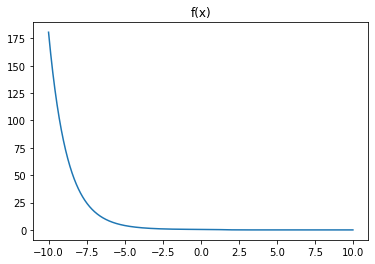

In [103]:
%%time
xs = np.array([float(i/50) for i in range(-500,500)])
ys = f1_of_x(xs)
plt.plot(xs,ys)
plt.title("f(x)");

Численно вычислить интеграл $$ \int_0^5 \sqrt{x+\sqrt{x}} dx$$

In [100]:
# определяем подинтегральную функцию
def f2_of_x(x):
    return (x+x**0.5)**0.5

CPU times: total: 31.2 ms
Wall time: 29 ms


Text(0.5, 1.0, 'f(x)')

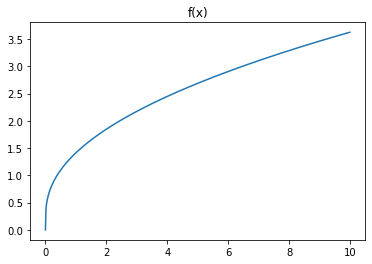

In [101]:
%%time
xs = np.array([float(i/50) for i in range(0,500)])
ys = f2_of_x(xs)
plt.plot(xs,ys)
plt.title("f(x)");

CPU times: total: 31.2 ms
Wall time: 29 ms


Text(0.5, 1.0, 'f(x)')

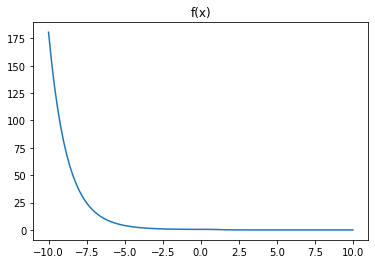

In [141]:
%%time
#xs = np.array([float(i/50) for i in range(0,500)])
xs = np.linspace(-10,10,100)
ys = f1_of_x(xs)
plt.plot(xs,ys)
plt.title("f(x)");

In [119]:
def crude_monte_carlo(f_of_x,upper_bound,lower_bound = 0,num_samples=500000):
    """
    This function performs the Crude Monte Carlo for our
    specific function f(x) on the range x=0 to x=5.
    Notice that this bound is sufficient because f(x)
    approaches 0 at around PI.
    Args:
    - num_samples (float) : number of samples
    Return:
    - Crude Monte Carlo estimation (float)
    
    """
    #lower_bound = 0 # нижний предел
    #upper_bound = 5 # верхний предел   
    
#     sum_of_samples = 0
#     for i in range(num_samples):
#         x = np.random.uniform(lower_bound, upper_bound) # генерим случайное число в пределах интегрирования
#         sum_of_samples += f_of_x(x)
    
    #return (upper_bound - lower_bound) * float(sum_of_samples/num_samples)
    res = np.vectorize(f_of_x)(np.random.uniform(0, upper_bound,num_samples)).mean()
    return (upper_bound - lower_bound) * res

In [121]:
print(crude_monte_carlo(f1_of_x,5))

0.6954963341077841


In [124]:
crude_monte_carlo1 = lambda x: crude_monte_carlo(f2_of_x,x)

In [125]:
crude_monte_carlo1(5)

9.602243244306276

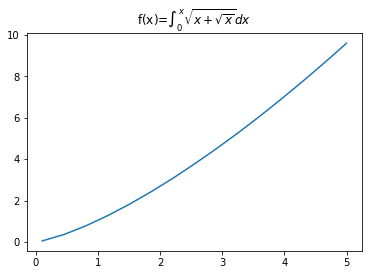

In [138]:
xs = np.linspace(0.1,5,15)
ys = np.vectorize(crude_monte_carlo1)(xs)
plt.plot(xs,ys)
plt.title(r"f(x)=$ \int_0^x \sqrt{x+\sqrt{x}} dx$");

## Численно вычислить интеграл вероятности Муавра-Лапласа
$$\frac{1}{\sqrt{2\pi}} \int_{-\infty}^x e^{-z^2 /2} dz \approx \frac{1}{\sqrt{2\pi}} \int_{-100}^x e^{-z^2 /2} dz$$

In [4]:
# определяем функцию плотности вероятности нормального распределения
# probability density function (PDF)
def normal_Gaussian_pdf(x,mu,sigma):
    return np.exp(-0.5*(x-mu)**2/sigma**2)/np.sqrt(2*np.pi+sigma**2)

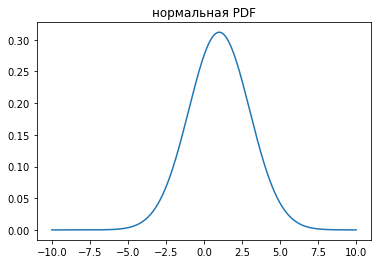

In [10]:
#xs = np.array([i/50 for i in range(-500,500)])
xs = np.linspace(-10,10,500)
ys = normal_Gaussian_pdf(xs,1,2)
plt.plot(xs,ys)
plt.title("нормальная PDF");

In [2]:
# определяем подинтегральную функцию интеграла 
# вероятности Муавра-Лапласа 
def standard_Gaussian_pdf(x):
    return np.exp(-0.5*x**2)/np.sqrt(2*np.pi)

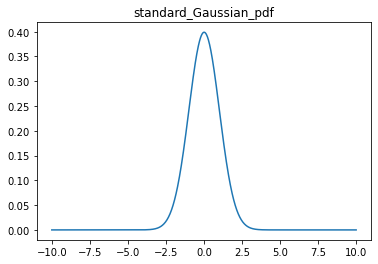

In [7]:
xs = np.array([i/50 for i in range(-500,500)])
ys = standard_Gaussian_pdf(xs)
plt.plot(xs,ys)
plt.title("standard_Gaussian_pdf");

In [74]:
def integr_Muavr_Laplas(upper_bound,num_samples=500000):
    lower_bound = -50
#     sum_of_samples = 0
#     for i in range(num_samples):
#         y = np.random.uniform(lower_bound, upper_bound) # генерим случайное число в пределах интегрирования
#         sum_of_samples += 1/(2*PI)*e**(-0.5*y**2)
#     return (upper_bound - lower_bound) * float(sum_of_samples/num_samples)
    res = np.exp(-0.5*(np.random.uniform(lower_bound, upper_bound,num_samples))**2).mean()
    
    return (upper_bound-lower_bound)*res/np.sqrt(2*PI)-0.5

In [75]:
integr_Muavr_Laplas(3)

0.5003515827141467

## Функция (интегральная) Лапласа

$$\Phi(x) = \frac{1}{\sqrt{2\pi}}\int_{0}^{x}e^{-\frac{t^2}{2}}dt$$

Функция Лапласа обладает следующими свойствами:
1. $\Phi(0) = 0$
2. $\Phi(-x) =- \Phi(x)$
3. $\Phi(\infty) = 0.5$


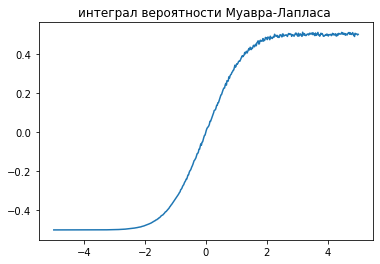

In [78]:
#xs = np.array([i/50 for i in range(-250,250)])
xs = np.linspace(-5,5,500)
vectorized_integr_Muavr_Laplas = np.vectorize(integr_Muavr_Laplas)
ys = vectorized_integr_Muavr_Laplas(xs)
# ys1 = Phi(xs)
# plt.plot(xs,ys1)
plt.plot(xs,ys)
plt.title("интеграл вероятности Муавра-Лапласа ");

In [2]:
from scipy.special import erf

def Phi(z): # интегральная функция Лапласа (значения совпадают с таблицами Брадиса)
    return 0.5*erf(z/np.sqrt(2))

In [16]:
Phi(3),Phi(1.73),Phi(0.32)

(0.4986501019683699, 0.45818486238640505, 0.12551583472332)

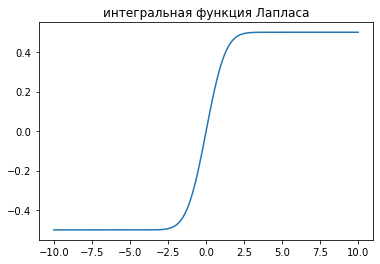

In [13]:
xs = np.array([i/50 for i in range(-500,500)])
ys = Phi(xs)
plt.plot(xs,ys)
plt.title("интегральная функция Лапласа");

In [34]:
from scipy.stats import norm

def func_Lalpas(x,loc=0, scale=1):# интегральная функция Лапласа (значения совпадают с таблицами Брадиса)    
    return norm(loc, scale).cdf(x)-0.5

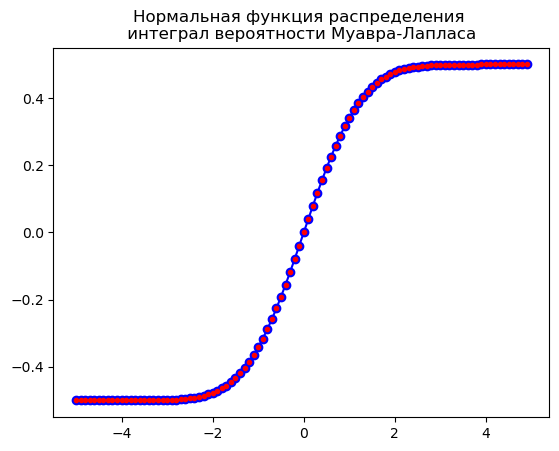

In [35]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


x = np.arange(-5,5,0.1)
y = stats.norm.cdf(x)-0.5#,loc = 0,scale = 1) # интегральная функция Лапласа (значения совпадают с таблицами Брадиса)
y1 = Phi(x)
y2 = func_Lalpas(x)

plt.plot(x,y,'ob')
plt.plot(x,y1,'-b')
plt.plot(x,y2,'.r')
plt.title("Нормальная функция распределения \n интеграл вероятности Муавра-Лапласа ");

In [143]:
stats.norm.cdf(3)-0.5

0.4986501019683699

## Определим точность нашей оценки

Насколько мы уверены в нашем ответе? Откуда мы знаем, что 10000 итераций  достаточно, чтобы получить хорошее приближение. Мы можем измерить нашу точность, найдя дисперсию наших оценок. Дисперсия определяется как «Среднее квадрата расстояний от среднего». Можно показать равным этому уравнению:
$$σ^2 = [\frac{b-a}{N}\sum_{i=1}^{N}f^2(x_i)] - [\sum_{i=1}^{N}\frac{b-a}{N}f(x_i)]^2$$
поскольку если $X$ - случайная величина, распределенная равномерно на отрезке $[b,a]$. А $f$ - некоторая функция, то $f(X)$ - элементарная случайная функция и её дисперсия равна $$ D(f) = M(f^2(X)) - M^2(f(X)) = [\sum_{i=1}^{N}f^2(x_i)\cdot p_i] - [\sum_{i=1}^{N}f(x_i)\cdot p_i]^2$$
Т.к. в нашем случае с.в.$X$ распределена равномерно на отрезке $[a,b]$, то $p_i = \frac{b-a}{N}$ и получаем 
$$σ^2 = D(f) = [\frac{b-a}{N}\sum_{i=1}^{N}f^2(x_i)] - [\sum_{i=1}^{N}\frac{b-a}{N}f(x_i)]^2$$

In [90]:
def get_crude_MC_variance_numpy(num_samples,lower_bound = 0,upper_bound = 5):
    """
    This function returns the variance for the Crude Monte Carlo.
    Note that the inputed number of samples does not neccissarily
    need to correspond to number of samples used in the Monte
    Carlo Simulation.
    Args:
    - num_samples (int)
    Return:
    - Variance for Crude Monte Carlo approximation of f(x) (float)
    """   
    
    running_total = np.vectorize(integr_Muavr_Laplas)(np.random.uniform(0, upper_bound,num_samples))
    
    return running_total.var()

Дисперсия дает нам представление о том, на сколько F(X) варьируется в области Икс. Оно зависит от объема выборки. А далее мы можем вычислить ошибку интегрирования рассчитав стандартную ошибку среднего, взяв квадратный корень из дисперсии, деленную на объем выборки. 

In [91]:
res_10_4 = get_crude_MC_variance_numpy(10000)
res_10_4, np.sqrt(res_10_4/10000)
# (19.961567881788657, 0.04467837047362925)

(0.017083292236793907, 0.0013070306896471064)

In [22]:
# res_10_5 = get_crude_MC_variance_numpy(100000)
# res_10_5, np.sqrt(res_10_5/100000)
# (19.98456827314877, 0.014136678631541699)

(0.03373251675843387, 0.0005807970106537556)

In [23]:
# res_10_6 = get_crude_MC_variance_numpy(1000000)
# res_10_6, np.sqrt(res_10_6/1000000)
# (19.95827719434609, 0.00446746876814445)

(0.03391226488817629, 0.00018415283024753187)